Emilia Zielinska <br>
300018129 <br>
CSI 5155 <br>
Dr. Herna Viktor <br>
February 13, 2024

# Assignment 1 - Supervised Learning
## A. Supervised Learning
### Data and Feature Engineering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [3]:
df['Age'] = 2024 - df['Year_Birth']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['NumPurchases'] = df['NumCatalogPurchases']

q1 = 35303
q3 = 68522
iqr = (q3 - q1) * 1.5
df[df['Income'] < (q1 - iqr)] = np.nan
df[df['Income'] > (q3 + iqr)] = np.nan

df['Marital_Status'] = df['Marital_Status'].replace({'Divorced':0, 'Single':0, 'Married':1, 'Together':1, 'Absurd':0, 'Widow':0, 'YOLO':0, 'Alone':0})
df['Education'] = df['Education'].replace({'Basic':0, '2n Cycle':0, 'Graduation':1, 'Master':1, 'PhD':1})

df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact', 'Z_Revenue', 'MntWines', 'MntSweetProducts', 'MntMeatProducts', 'MntGoldProds', 'MntFruits', 'MntFishProducts', 'Dt_Customer'], axis=1, inplace=True)
df.dropna(inplace=True)
df.describe()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Children,Spending,NumPurchases
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,0.884964,0.644475,51633.638134,49.014040,2.316576,4.098279,2.644928,5.819293,5.334239,0.009511,55.192935,0.948370,606.875906,2.644928
std,0.319138,0.478781,20713.376530,28.938638,1.885450,2.736724,2.798441,3.241866,2.413837,0.097081,11.991913,0.748995,602.090272,2.798441
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000,0.000000
25%,1.000000,0.000000,35196.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,47.000000,0.000000,69.000000,0.000000
50%,1.000000,1.000000,51301.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,54.000000,1.000000,397.000000,2.000000
75%,1.000000,1.000000,68289.750000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,65.000000,1.000000,1047.250000,4.000000
max,1.000000,1.000000,113734.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,131.000000,3.000000,2525.000000,28.000000


### Modelling and Evaluation

In [4]:
X = df.drop('Complain', axis=1)
y = df['Complain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

cv = KFold(10, shuffle=True, random_state=3)

In [5]:
def evaluate(model):
    val_score = cross_val_score(model, X, y, cv=cv, scoring='f1')
    print('Average cross-validation score:', val_score.mean())
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, 
        annot=True,
        fmt='g', 
        xticklabels=['Complainer','Not Complainer'],
        yticklabels=['Complainer','Not Complainer'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()
    
    tp, fp, fn, tn = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print('Precision:', precision)
    print('Recall:', recall)
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Decision Tree Evaluations
-------------------------
Average cross-validation score: 0.12


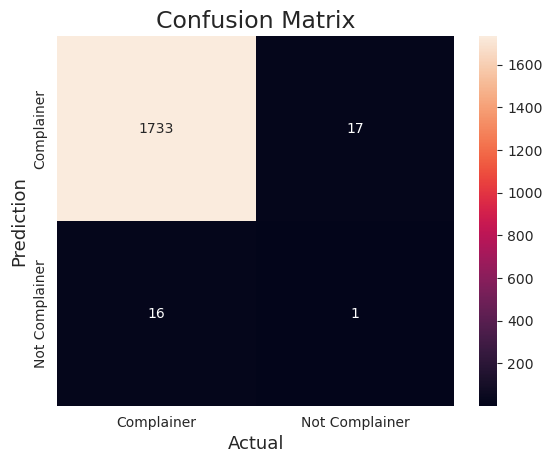

Precision: 0.9902857142857143
Recall: 0.9908519153802172


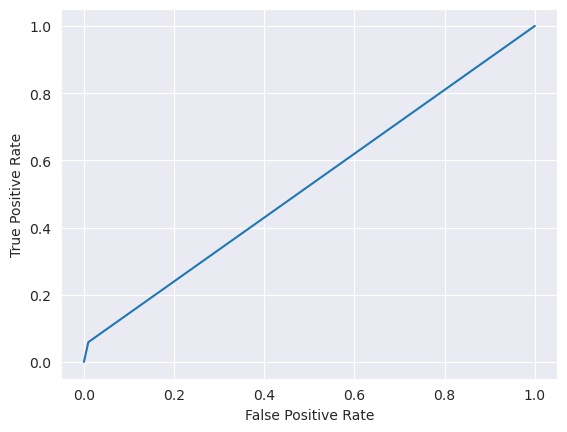

In [9]:
dt = DecisionTreeClassifier(max_depth=100)
dt.fit(X_train, y_train)
print('Decision Tree Evaluations')
print('-------------------------')
evaluate(dt)

Random Forest Evaluations
-------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


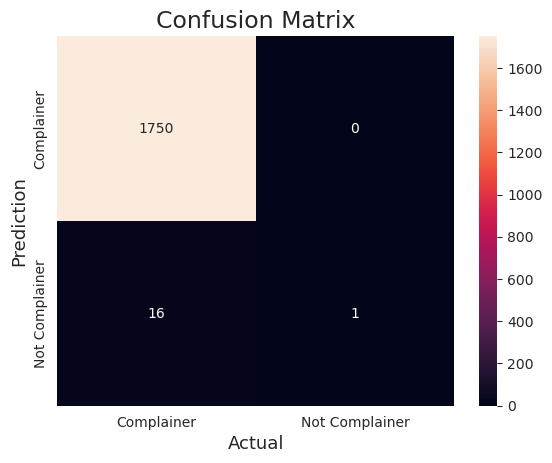

Precision: 1.0
Recall: 0.9909399773499433


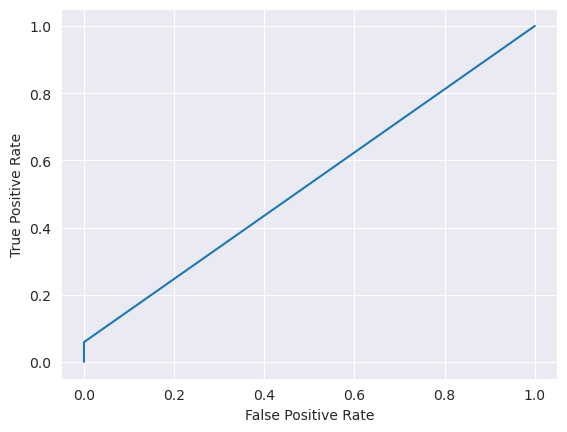

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Evaluations')
print('-------------------------')
evaluate(rf)

Support Vector Classifier Evaluations
-------------------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


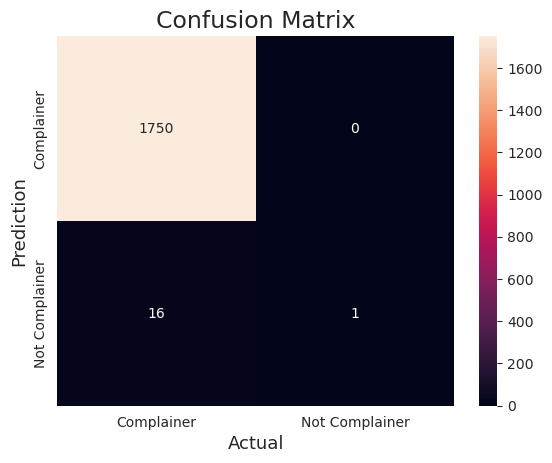

Precision: 1.0
Recall: 0.9909399773499433


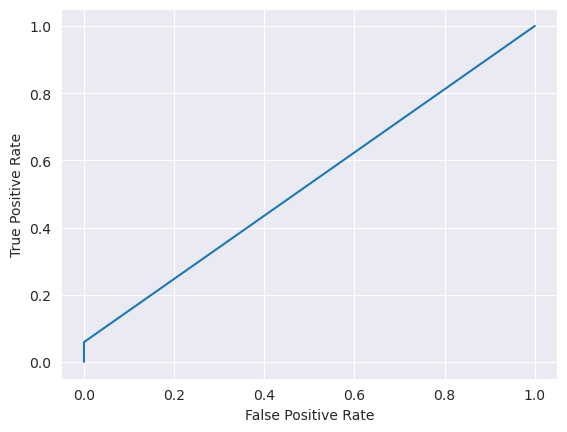

In [21]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print('Support Vector Classifier Evaluations')
print('-------------------------------------')
evaluate(svc)

Gradient Boosting Evaluations
-----------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.125


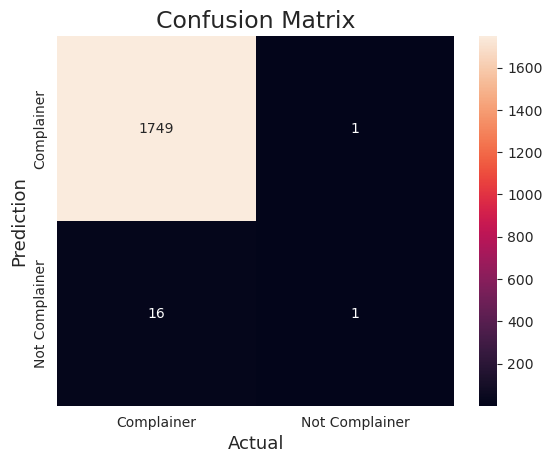

Precision: 0.9994285714285714
Recall: 0.9909348441926346


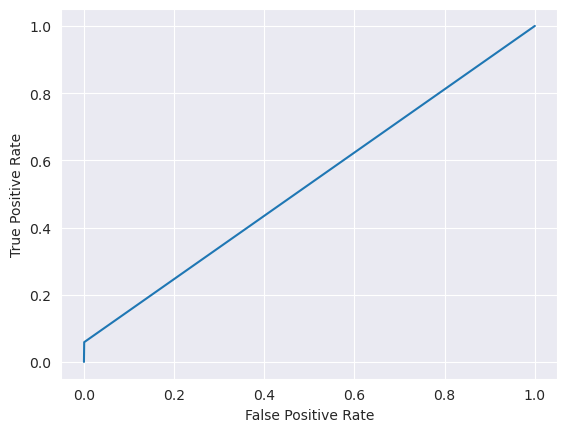

In [36]:
gb = GradientBoostingClassifier(learning_rate=0.25, max_features='log2')
gb.fit(X_train, y_train)
print('Gradient Boosting Evaluations')
print('-----------------------------')
evaluate(gb)

Multi-Layer Perceptron Evaluations
----------------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.0


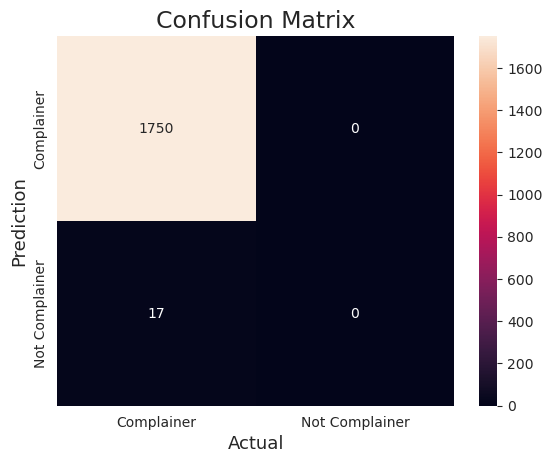

Precision: 1.0
Recall: 0.9903791737408036


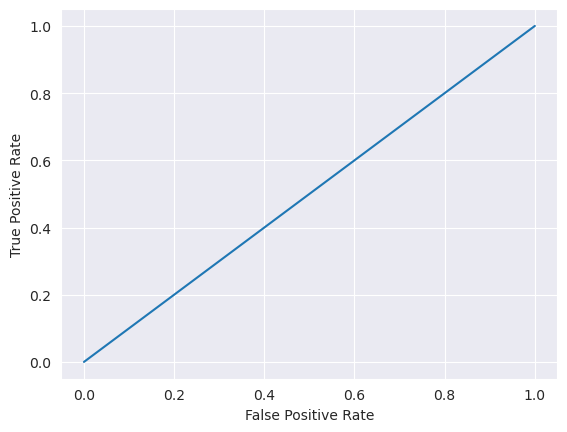

In [49]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print('Multi-Layer Perceptron Evaluations')
print('----------------------------------')
evaluate(mlp)

K-Nearest Neighbour Evaluations
-------------------------------
Average cross-validation score: 0.12857142857142856


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


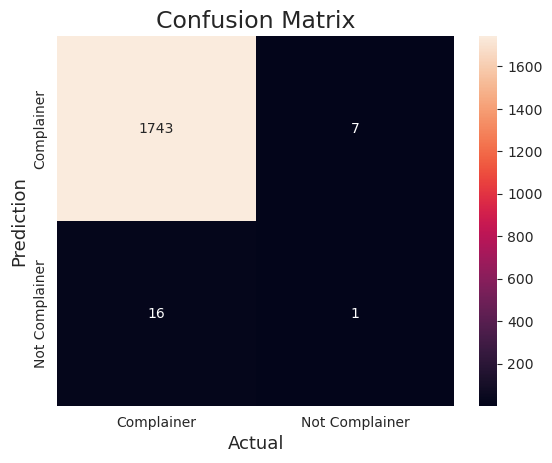

Precision: 0.996
Recall: 0.9909039226833428


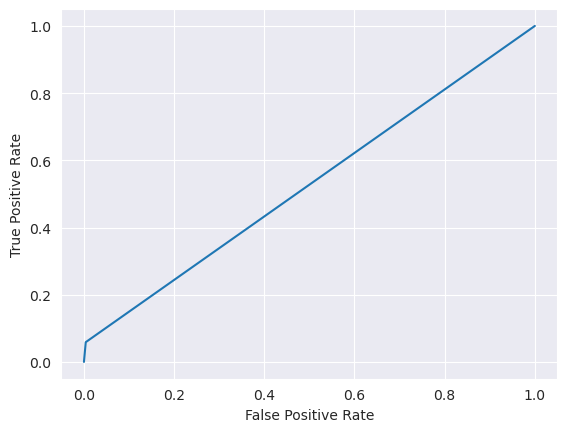

In [57]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)
print('K-Nearest Neighbour Evaluations')
print('-------------------------------')
evaluate(knn)

## B. Class Imbalance
### Undersampling

In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [62]:
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X_train, y_train)

Decision Tree Evaluations
-------------------------
Average cross-validation score: 0.10555555555555554


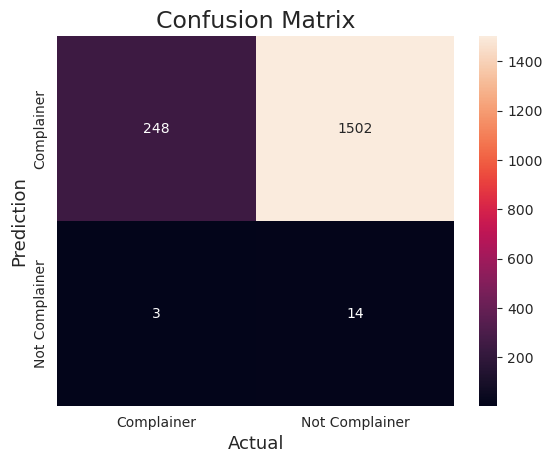

Precision: 0.1417142857142857
Recall: 0.9880478087649402


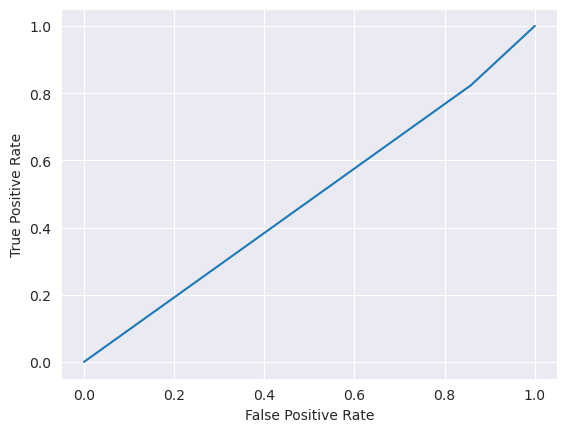

In [66]:
dt_nm = DecisionTreeClassifier(max_depth=100)
dt_nm.fit(X_train_miss, y_train_miss)
print('Decision Tree Evaluations')
print('-------------------------')
evaluate(dt_nm)

Random Forest Evaluations
-------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


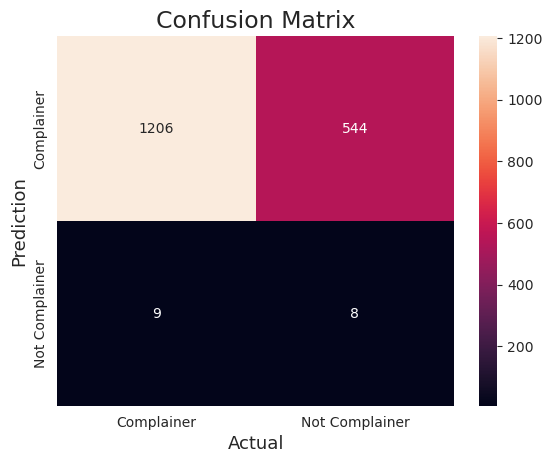

Precision: 0.6891428571428572
Recall: 0.9925925925925926


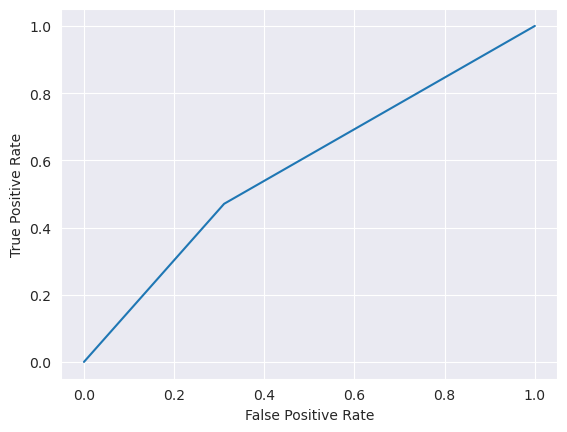

In [67]:
rf_nm = RandomForestClassifier()
rf_nm.fit(X_train_miss, y_train_miss)
print('Random Forest Evaluations')
print('-------------------------')
evaluate(rf_nm)

Support Vector Classifier Evaluations
-------------------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


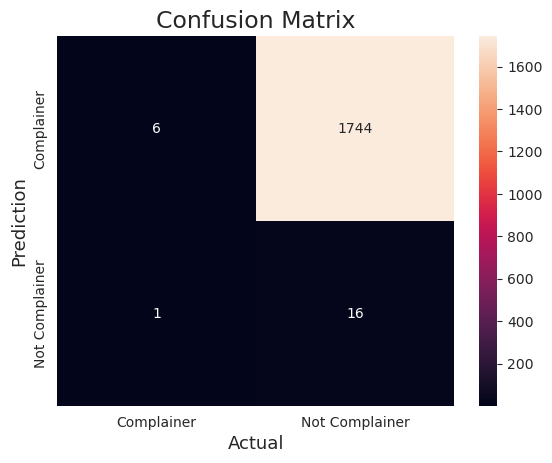

Precision: 0.0034285714285714284
Recall: 0.8571428571428571


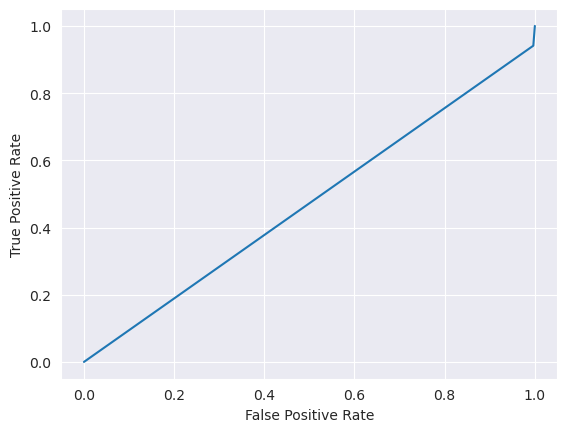

In [68]:
svc_nm = SVC(gamma='auto')
svc_nm.fit(X_train_miss, y_train_miss)
print('Support Vector Classifier Evaluations')
print('-------------------------------------')
evaluate(svc_nm)

Gradient Boosting Evaluations
-----------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


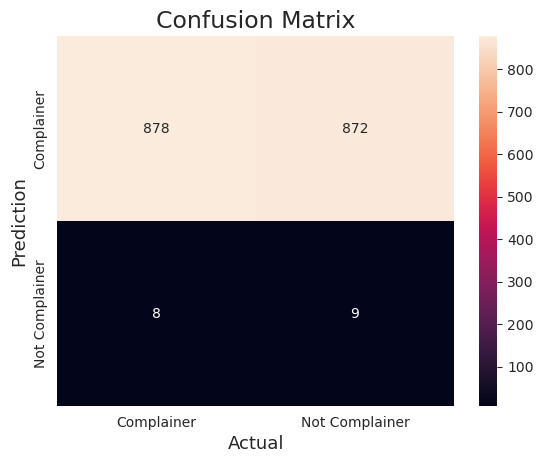

Precision: 0.5017142857142857
Recall: 0.9909706546275395


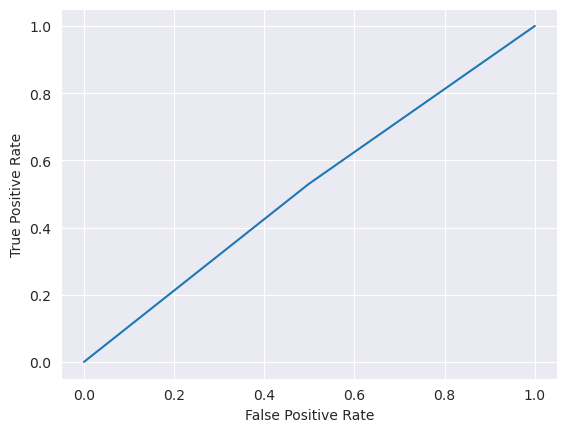

In [69]:
gb_nm = GradientBoostingClassifier(learning_rate=0.25, max_features='log2')
gb_nm.fit(X_train_miss, y_train_miss)
print('Gradient Boosting Evaluations')
print('-----------------------------')
evaluate(gb_nm)

Multi-Layer Perceptron Evaluations
----------------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.0


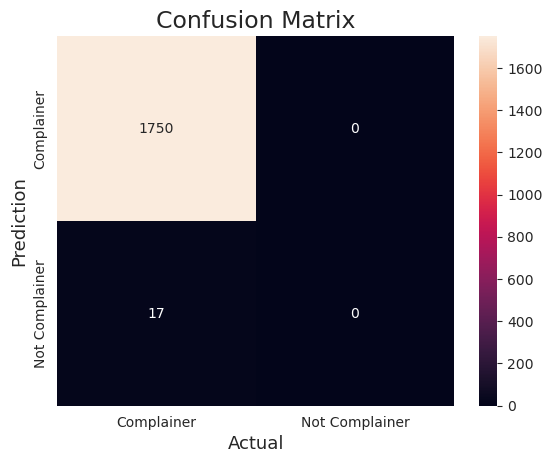

Precision: 1.0
Recall: 0.9903791737408036


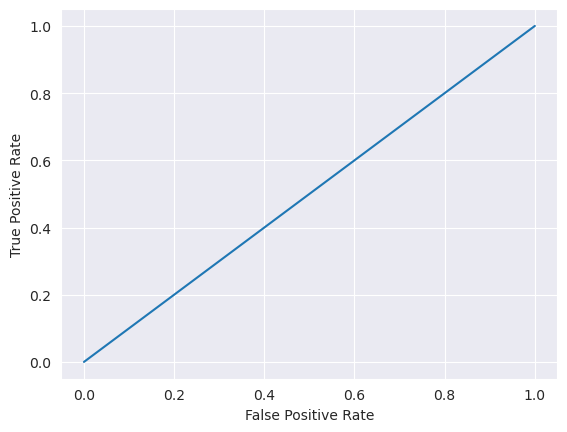

In [70]:
mlp_nm = MLPClassifier()
mlp_nm.fit(X_train_miss, y_train_miss)
print('Multi-Layer Perceptron Evaluations')
print('----------------------------------')
evaluate(mlp_nm)

K-Nearest Neighbour Evaluations
-------------------------------
Average cross-validation score: 0.12857142857142856


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


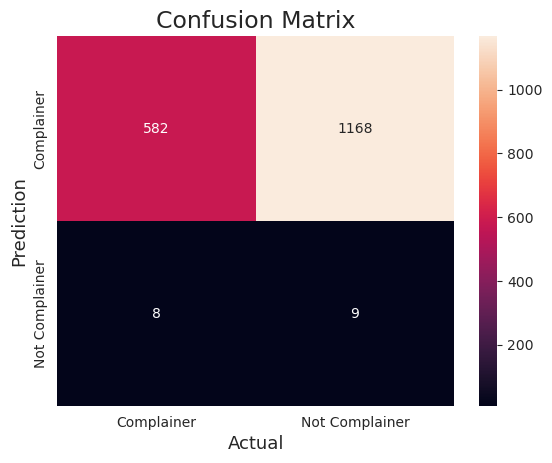

Precision: 0.3325714285714286
Recall: 0.9864406779661017


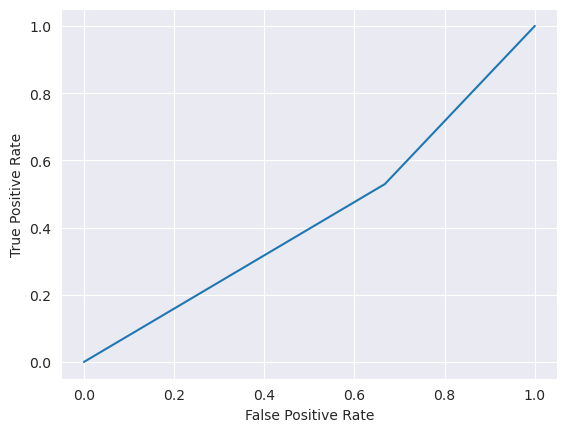

In [71]:
knn_nm = KNeighborsClassifier(weights='distance')
knn_nm.fit(X_train_miss, y_train_miss)
print('K-Nearest Neighbour Evaluations')
print('-------------------------------')
evaluate(knn_nm)

### Oversampling

In [80]:
sm = SMOTE(k_neighbors=3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 

Decision Tree Evaluations
-------------------------
Average cross-validation score: 0.12666666666666665


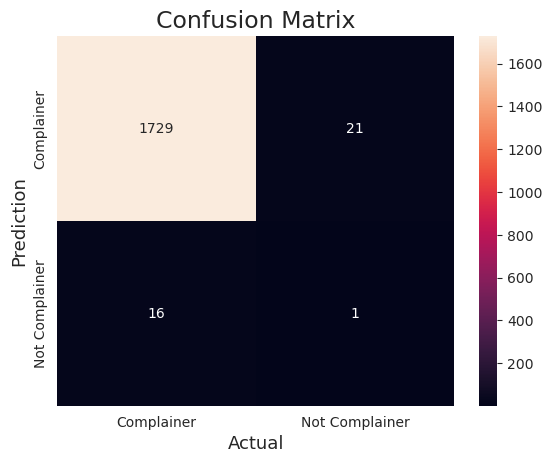

Precision: 0.988
Recall: 0.9908309455587393


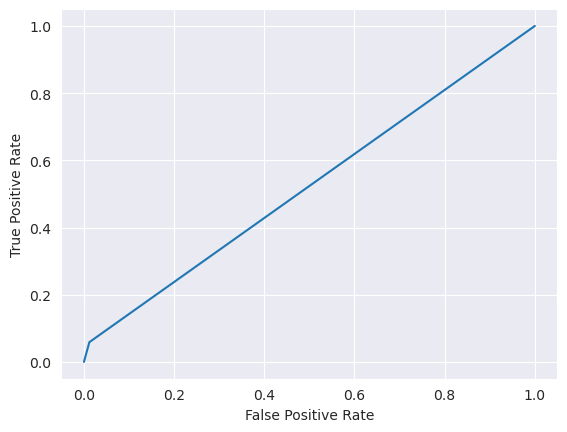

In [81]:
dt_sm = DecisionTreeClassifier(max_depth=100)
dt_sm.fit(X_train_res, y_train_res)
print('Decision Tree Evaluations')
print('-------------------------')
evaluate(dt_sm)

Random Forest Evaluations
-------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


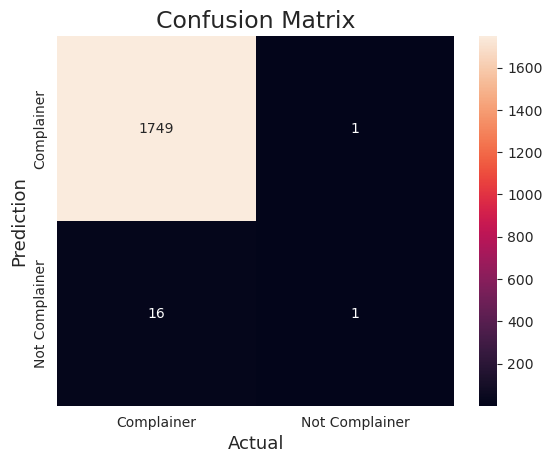

Precision: 0.9994285714285714
Recall: 0.9909348441926346


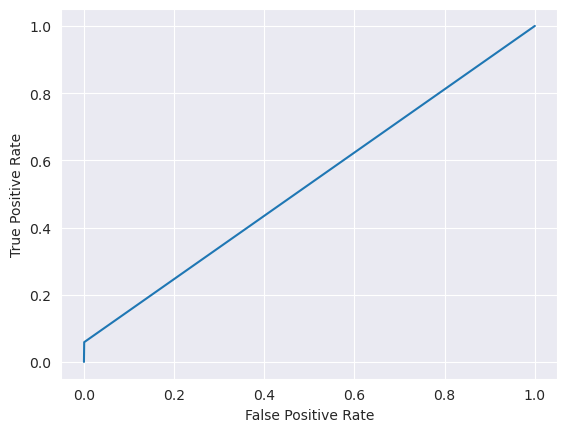

In [82]:
rf_sm = RandomForestClassifier()
rf_sm.fit(X_train_res, y_train_res)
print('Random Forest Evaluations')
print('-------------------------')
evaluate(rf_sm)

Support Vector Classifier Evaluations
-------------------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.12857142857142856


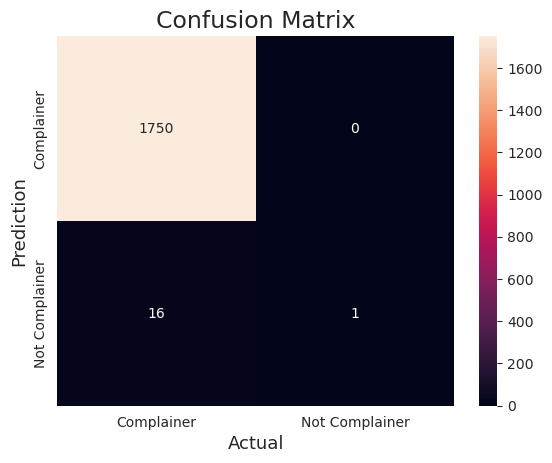

Precision: 1.0
Recall: 0.9909399773499433


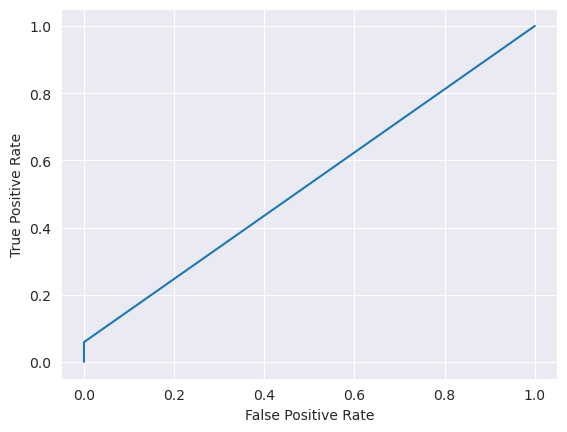

In [83]:
svc_sm = SVC(gamma='auto')
svc_sm.fit(X_train_res, y_train_res)
print('Support Vector Classifier Evaluations')
print('-------------------------------------')
evaluate(svc_sm)

Gradient Boosting Evaluations
-----------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.125


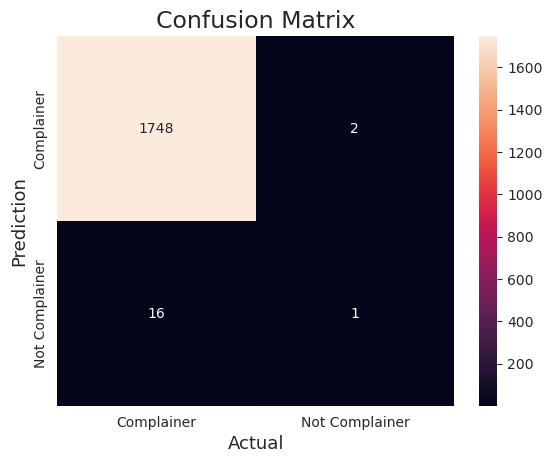

Precision: 0.9988571428571429
Recall: 0.9909297052154195


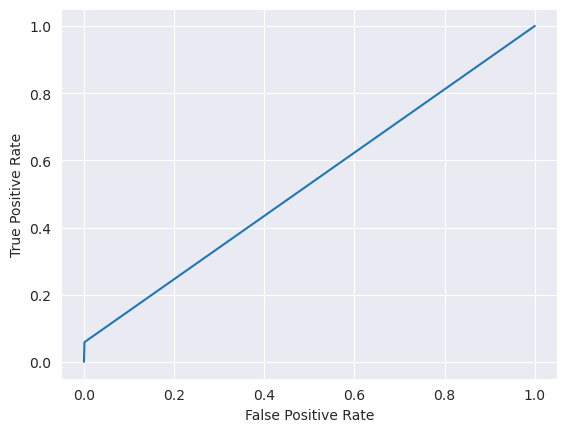

In [89]:
gb_sm = GradientBoostingClassifier(learning_rate=0.25, max_features='log2')
gb_sm.fit(X_train_res, y_train_res)
print('Gradient Boosting Evaluations')
print('-----------------------------')
evaluate(gb_sm)

Multi-Layer Perceptron Evaluations
----------------------------------


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Average cross-validation score: 0.0


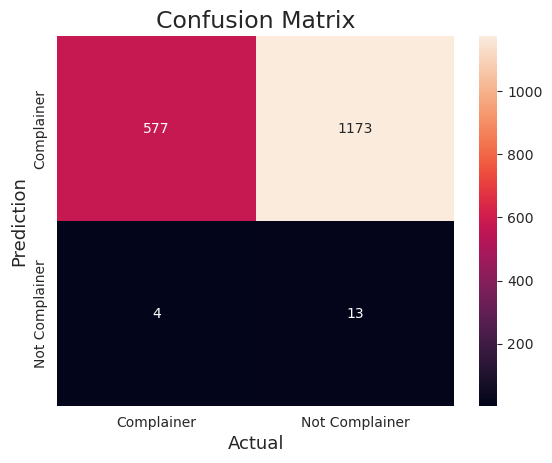

Precision: 0.32971428571428574
Recall: 0.9931153184165232


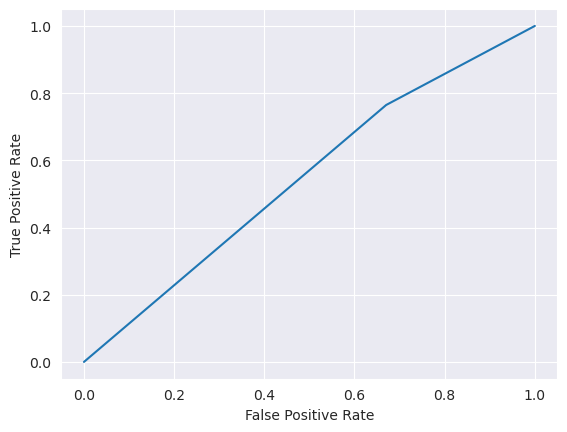

In [90]:
mlp_sm = MLPClassifier()
mlp_sm.fit(X_train_res, y_train_res)
print('Multi-Layer Perceptron Evaluations')
print('----------------------------------')
evaluate(mlp_sm)

K-Nearest Neighbour Evaluations
-------------------------------
Average cross-validation score: 0.12857142857142856


/home/emilia/anaconda3/envs/ml-a1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


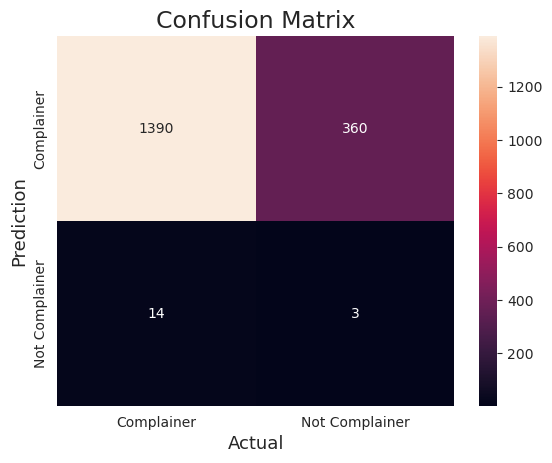

Precision: 0.7942857142857143
Recall: 0.99002849002849


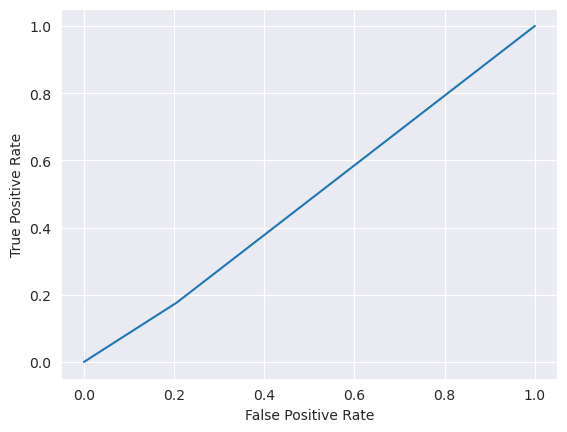

In [91]:
knn_sm = KNeighborsClassifier(weights='distance')
knn_sm.fit(X_train_res, y_train_res)
print('K-Nearest Neighbour Evaluations')
print('-------------------------------')
evaluate(knn_sm)

## C. Reporting

| Model                  | 10-Fold Cross Evaluation Score | Precision | Recall |
|------------------------|--------------------------------|-----------|--------|
| Decision Tree          | 0.12                           | 0.990     | 0.991  |
| DT Undersampling       | 0.106                          | 0.142     | 0.988  |
| DT Oversampling        | 0.127                          | 0.988     | 0.991  |
| Random Forest          | 0.129                          | 1.0       | 0.991  |
| RF Undersampling       | 0.129                          | 0.689     | 0.993  |
| RF Oversampling        | 0.129                          | 0.999     | 0.991  |
| Support Vector Machine | 0.129                          | 1.0       | 0.991  |
| SVM Undersampling      | 0.129                          | 0.003     | 0.857  |
| SVM Oversampling       | 0.129                          | 1.0       | 0.991  |
| Gradient Boosting      | 0.125                          | 0.999     | 0.991  |
| GB Undersampling       | 0.129                          | 0.502     | 0.991  |
| GB Oversampling        | 0.125                          | 0.999     | 0.991  |
| Multi-Layer Perceptron | 0.0                            | 1.0       | 0.990  |
| MLP Undersampling      | 0.0                            | 1.0       | 0.990  |
| MLP Oversampling       | 0.0                            | 0.330     | 0.993  |
| K-Nearest Neighbours   | 0.129                          | 0.996     | 0.991  |
| KNN Undersampling      | 0.129                          | 0.333     | 0.986  |
| KNN Oversampling       | 0.129                          | 0.794     | 0.990  |

(Please note: the confusion matrices have been accidentally labelled incorrectly - complainer and not complainer should be switched.)

The table above shows the results from each experiment, each number rounded to the third decimal place. As we can see by precision and recall, all the models perform exceptionally well when no sampling is involved. The models have near-perfect precision and recall scores. However, this is a false metric because of how imbalanced the data is. The majority of people in the data have not complained, and so all the models are biased towards the "not complainer" prediction.

Once we start undersampling using the near miss algorithm and oversampling using SMOTE, we start to see more variations in the predictions. For most of the models, save the multi-layer perceptron, accuracy tends to plummet. While undersampling does have the models predict "complainer" more often, it does not fix the issue that the test data does not have enough "complainers" for prediction - the number of "non-complainers" had gone down but there still weren't enough "complainers".

Now looking at the precision and the recall scores after oversampling, most of the models, save for the multi-layer perceptron model and the k-nearest neighbours model, bounce back to having high scores. However, looking at the confusion matrices for these models, the SMOTE algorithm may have sampled more "not complainers" than the desired "complainers", further imbalancing the data. Most of the predictions are true positives for "not complainers".

In all experiments, the multi-layer perceptron model has its 10-fold cross evaluation score at 0.0, despite my playing around with almost every parameter available in the scikit-learn documentation. From the warnings given in the code, it seems like the F1 score was a bad measure to use for the 10-fold cross evaluation score. The scikit-learn website did state that F1 scoring is good for binary targets which is why I kept it the way it is. Most of the models have a similar 10-fold cross evaluation score at 0.129, which mostly did not change no matter which parameters I changed. For the case of the multi-layer perceptron model, we can assume that it would receive a similar score if it were able to provide a proper score.

These experiments show that the model chosen doesn't matter much if the data is imbalanced - it'll give you false metrics on how good your model is and if proper investigations aren't done, it's easy to overlook an overly biased model. Although in this case, maybe it's better that most people don't complain, and hopefully those that do have good reason for it.